In [3]:
# Import module

# Pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# Regualar expression
#import re

In [4]:
# Functions module

# Convert Runtime columns
def convert_to_minutes_range(value):
    if '<' in value:
        return '0-30 mins'
    elif '>' in value:
        return '120+ mins'  # Assuming "> 2 hrs" means more than 2 hours
    elif '1-2' in value:
        return '60-120 mins'  # Assuming "1-2 hour" means 60 to 120 minutes
    elif '30-60' in value:
        return '30-60 mins'  # Assuming "30-60 mins" means 30 to 60 minutes
    else:
        return 'Unknown'

In [5]:
# DF read module

# Read the CSV file
file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/set.csv'
df = pd.read_csv(file_path)

In [6]:
# Data cleanup module

# Drop duplicate values
df = df.drop_duplicates(keep='first')

# Fillna for categorical and numerical columns
categorical_columns = ['Genre', 'Languages', 'Director', 'Actors', 'Country Availability', 'Production House', 'Runtime']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

numerical_columns = ['View Rating', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score']
df[numerical_columns] = df[numerical_columns].fillna('')

# Drop unnecessary columns
junk_columns = ['Netflix Link', 'IMDb Link', 'Tags', 'Writer', 'Summary', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site']
df = df.drop(junk_columns, axis=1)

# Handle 'Release Date', 'Netflix Release Date' columns
# Convert date columns to datetime and format
date_columns = ['Release Date', 'Netflix Release Date']
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df[date_columns] = df[date_columns].apply(lambda t: t.dt.strftime('%Y-%m-%d'))
# Fillna for date columns
for col in date_columns:
    df[col].fillna(pd.NaT, inplace=True)
    df[f'{col.split()[0]}Year'] = pd.DatetimeIndex(df[col]).year
    df[f'{col.split()[0]}Month'] = pd.DatetimeIndex(df[col]).month
    df[f'{col.split()[0]}Year'] = pd.to_numeric(df[f'{col.split()[0]}Year'], errors='coerce').fillna(0).astype(int)
    df[f'{col.split()[0]}Month'] = pd.to_numeric(df[f'{col.split()[0]}Month'], errors='coerce').fillna(0).astype(int)
    df.loc[df[f'{col.split()[0]}Year'] > 2021, f'{col.split()[0]}Year'] -= 100

# Handle Awards columns
awards_columns = ['Awards Received', 'Awards Nominated For']
df[awards_columns] = df[awards_columns].fillna(0).astype(int)
df['Total Awards'] = df[awards_columns].sum(axis=1)

# Handle IMDb Votes column
# Convert IMDb Votes to int
df['IMDb Votes'] = df['IMDb Votes'].fillna(0).astype(int)

# Handle Boxoffice column
df['Boxoffice'] = pd.to_numeric(df['Boxoffice'].replace('[^\d]', '', regex=True), errors='coerce').fillna('Unknown')

# Handle Runtime column 
# Apply the function to the "Runtime" column and create a new column "Runtime (mins)"
df['Runtime (mins)'] = df['Runtime'].apply(convert_to_minutes_range)

C:\Users\ganes\AppData\Local\Temp\ipykernel_26840\1754086235.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_columns] = df[date_columns].apply(pd.to_datetime)
C:\Users\ganes\AppData\Local\Temp\ipykernel_26840\1754086235.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_columns] = df[date_columns].apply(pd.to_datetime)


In [7]:
# DF export module

output_file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
df.to_excel(output_file_path, index=False)
print(f"DataFrame exported to {output_file_path}")

DataFrame exported to C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx


In [37]:
#Creating the exploding data frames for futher analysis later
#Explode the 'Genres' and 'Country Availability' columns
df['Genre'] = df['Genre'].astype(str)
df['Country Availability'] = df['Country Availability'].astype(str)
df['Languages'] = df['Languages'].astype(str)

df_exploded_Genre = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
df_exploded_Country= df.assign(Country_Availability=df['Country Availability'].str.split(',')).explode('Country_Availability')
df_exploded_Language= df.assign(Languages=df['Languages'].str.split(',')).explode('Languages')
df_exploded_Genre['Genre'] = df_exploded_Genre['Genre'].str.replace('\s+',' ', regex=True).str.strip()
df_exploded_Country['Country_Availability'] = df_exploded_Country['Country_Availability'].str.replace('\s+',' ', regex=True).str.strip()
df_exploded_Language['Languages'] = df_exploded_Language['Languages'].str.replace('\s+',' ', regex=True).str.strip()
# df_exploded_Genre['Genre'] = df_exploded_Genre['Genre'].str.strip()
# df_exploded_Country['Country_Availability']= df_exploded_Country['Country_Availability'].str.strip()
# df_exploded_Language['Languages'] = df_exploded_Language['Languages'].str.strip()


In [39]:
#quick overiew of the dataframe

df.head(5)
df.info()
df.nunique()
df_exploded_Genre[['Genre']].value_counts()
df_exploded_Country[['Country_Availability']].value_counts()
df_exploded_Language[['Languages']].value_counts()

,Title,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Actors,View Rating,...,Release Date,Netflix Release Date,Production House,IMDb Votes,ReleaseYear,ReleaseMonth,NetflixYear,NetflixMonth,Total Awards,Runtime (mins)
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,...,2008-12-12,2021-04-03,"Canal+, Sandrew Metronome",205926,2008,12,2021,4,131,0-30 mins
1,HOW TO BUILD A GIRL,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,...,2020-08-05,2021-04-03,"Film 4, Monumental Pictures, Lionsgate",2838,2020,8,2021,4,1,60-120 mins
2,The Con-Heartist,"Comedy, Romance",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,...,2020-03-12,2021-03-03,Unknown,131,2020,3,2021,3,0,120+ mins
3,Gleboka woda,Drama,Polish,Series,8.7,Poland,< 30 minutes,Unknown,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,...,2011-06-14,2021-03-03,Unknown,47,2011,6,2021,3,6,0-30 mins
4,Only a Mother,Drama,Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,...,2049-10-31,2021-03-03,Unknown,88,1949,10,2021,3,3,60-120 mins


## Performing Exploratory Data Analysis


In [6]:

# Read the cleaned excel file
file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
df = pd.read_excel(file_path)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  9425 non-null   object 
 1   Genre                  9425 non-null   object 
 2   Languages              9425 non-null   object 
 3   Series or Movie        9425 non-null   object 
 4   Hidden Gem Score       9415 non-null   float64
 5   Country Availability   9425 non-null   object 
 6   Runtime                9425 non-null   object 
 7   Director               9425 non-null   object 
 8   Actors                 9425 non-null   object 
 9   View Rating            6827 non-null   object 
 10  IMDb Score             9417 non-null   float64
 11  Rotten Tomatoes Score  5445 non-null   float64
 12  Metacritic Score       4082 non-null   float64
 13  Awards Received        9425 non-null   int64  
 14  Awards Nominated For   9425 non-null   int64  
 15  Boxo

In [8]:
# summary statistics
print(df.head(1))
#print(df.columns)

# Explode the 'Genres' and 'Languages' columns
df['Genre'] = df['Genre'].astype(str)
df['Country Availability'] = df['Country Availability'].astype(str)

df = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
df= df.assign(Country_Availability=df['Country Availability'].str.split(',')).explode('Country_Availability')
df[df['Title'] =='Only a Mother']
df.nunique()

              Title                                   Genre         Languages  \
0  Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance  Swedish, Spanish   

  Series or Movie  Hidden Gem Score Country Availability       Runtime  \
0          Series               4.3             Thailand  < 30 minutes   

          Director                                             Actors  \
0  Tomas Alfredson  Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...   

  View Rating  ...  Release Date  Netflix Release Date  \
0           R  ...    2008-12-12            2021-04-03   

            Production House  IMDb Votes  ReleaseYear ReleaseMonth  \
0  Canal+, Sandrew Metronome      205926         2008           12   

  NetflixYear NetflixMonth Total Awards  Runtime (mins)  
0        2021            4          131       0-30 mins  

[1 rows x 26 columns]


Title                    9166
Genre                      55
Languages                1209
Series or Movie             2
Hidden Gem Score           93
Country Availability     5282
Runtime                     5
Director                 4253
Actors                   8836
View Rating                24
IMDb Score                 72
Rotten Tomatoes Score     101
Metacritic Score           92
Awards Received           131
Awards Nominated For      201
Boxoffice                3590
Release Date             4355
Netflix Release Date     1642
Production House         3277
IMDb Votes               6992
ReleaseYear                89
ReleaseMonth               13
NetflixYear                 7
NetflixMonth               12
Total Awards              266
Runtime (mins)              5
Country_Availability       37
dtype: int64

## Top 10 Movies and Series by Total Awards and Nominations 

In [9]:
# Display Titles of Top 10 movies and Top 10 Series
df_1 = df[['Title','Series or Movie','Total Awards','ReleaseYear']]
df_1 = df_1.drop_duplicates()
df_1 = df_1.reset_index(drop=True)
df_1_sorted = df_1[df_1['Series or Movie'] == 'Series'].sort_values(by='Total Awards',ascending = False)
df_2_sorted = df_1[df_1['Series or Movie'] == 'Movie'].sort_values(by='Total Awards',ascending = False)
result_1 = pd.concat([df_1_sorted.head(10), df_2_sorted.head(10)], axis=0)
print(result_1.to_string(index=False))

                                          Title Series or Movie  Total Awards  ReleaseYear
                                  Sesame Street          Series           549         1969
                          American Horror Story          Series           513         2011
                                  Modern Family          Series           502         2009
                                 Will and Grace          Series           410         1998
                                   Breaking Bad          Series           390         2008
                            The Big Bang Theory          Series           328         2006
                                  Greys Anatomy          Series           312         2005
                               The Walking Dead          Series           301         2010
                                        Friends          Series           297         1994
                                           Glee          Series           295         2009

## Run Time:  Mix over the years

Runtime      1-2 hour  30-60 mins  < 30 minutes  > 2 hrs
ReleaseYear                                             
2001             61.0         3.0           1.0     32.0
2002             80.0         2.0           2.0     19.0
2003             91.0         1.0           2.0     33.0
2004             95.0         1.0           1.0     29.0
2005            108.0         1.0           1.0     42.0
2006            127.0         2.0           NaN     45.0
2007            126.0         1.0           2.0     46.0
2008            137.0         2.0           5.0     41.0
2009            119.0         1.0           NaN     52.0
2010            174.0         3.0           4.0     49.0
2011            210.0         1.0           5.0     52.0
2012            209.0         2.0           4.0     66.0
2013            228.0         6.0           4.0     77.0
2014            242.0         3.0           5.0     77.0
2015            286.0        13.0           8.0    103.0
2016            379.0         4

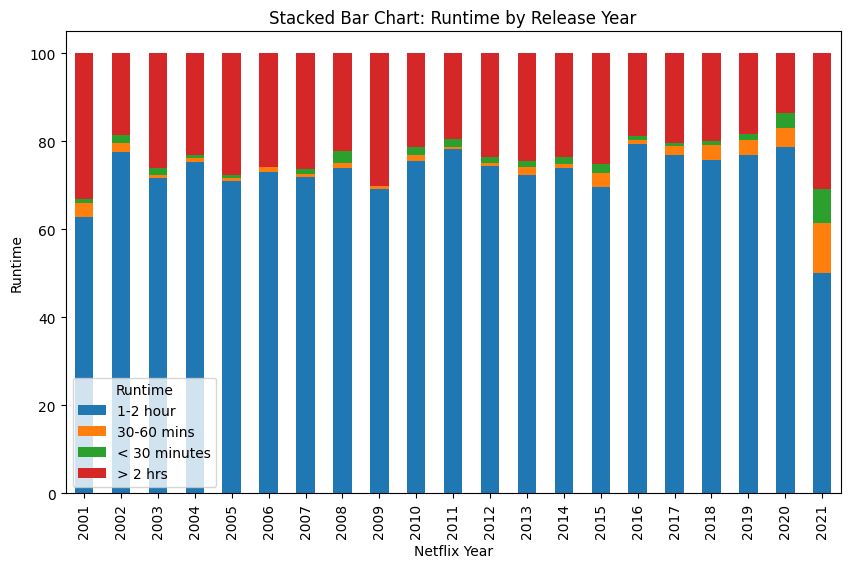

In [10]:
# Stacked bar chart on Run time trends over the years
df_2 = df[['Title','Series or Movie','Runtime','ReleaseYear']]
df_2 = df_2.drop_duplicates()
df_2 = df_2[(df_2['Series or Movie'] == 'Movie') & (df_2['ReleaseYear'] > 2000)]

pivot_df = df_2.pivot_table(index='ReleaseYear', columns='Runtime', values='Title',aggfunc = 'count')

# Display the DataFrame after pivoting
print(pivot_df)

# Normalize the values for each column to get percentages
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
# Create a stacked bar chart
pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Netflix Year')
plt.ylabel('Runtime')
plt.title('Stacked Bar Chart: Runtime by Release Year')

# Show the plot
plt.show()

## Release mix over the years

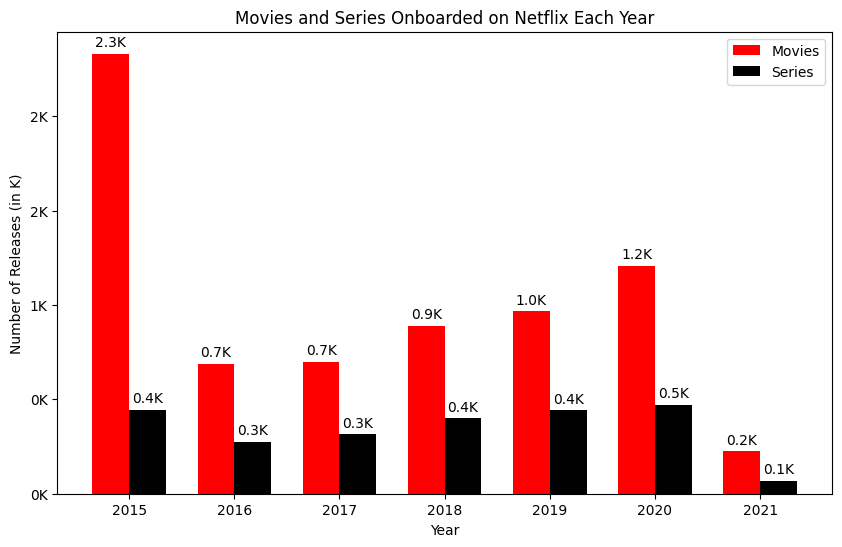

In [40]:
# Read the cleaned excel file
file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
df = pd.read_excel(file_path)
df_3 = df[df['Series or Movie'] == 'Movie']
df_4 = df[df['Series or Movie'] == 'Series']

# Count the number of movies and series released each year on Netflix
movie_counts = df_3.groupby('NetflixYear').size()
series_counts = df_4.groupby('NetflixYear').size()
concated_df = pd.concat([movie_counts,series_counts],axis=0)

# Plotting
width = 0.35  # Width of the bars
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(movie_counts.index - width/2, movie_counts.values, width, label='Movies', color = 'red')
bar2 = ax.bar(series_counts.index + width/2, series_counts.values, width, label='Series', color = 'black')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Releases (in K)')
ax.set_title('Movies and Series Onboarded on Netflix Each Year')
ax.legend()

# Show bar values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.1f}K'.format(height / 1000),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

# Format y-axis labels to display 'K'
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))

plt.show()

Series or Movie  Movie  Series
NetflixYear                   
2015              2331     444
2016               688     274
2017               699     315
2018               890     399
2019               967     443
2020              1209     471
2021               226      69


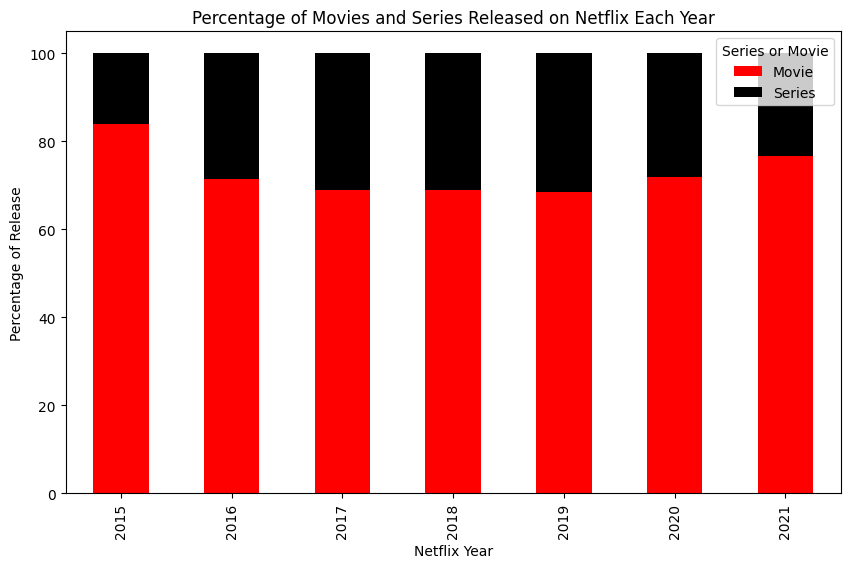

In [42]:
# Stacked bar chart on Run time trends over the years
df_5 = df[['Title','Series or Movie','NetflixYear']]

pivot_df_2 = df_5.pivot_table(index='NetflixYear', columns='Series or Movie', values='Title',aggfunc = 'count')

# Display the DataFrame after pivoting
print(pivot_df_2)

# Normalize the values for each column to get percentages
pivot_df_percentage_2 = pivot_df_2.div(pivot_df_2.sum(axis=1), axis=0) * 100
# Create a stacked bar chart
pivot_df_percentage_2.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['red','black'])

# Add labels and title
plt.xlabel('Netflix Year')
plt.ylabel('Percentage of Release')
plt.title('Percentage of Movies and Series Released on Netflix Each Year')

# Show the plot
plt.show()


## Average Age of release

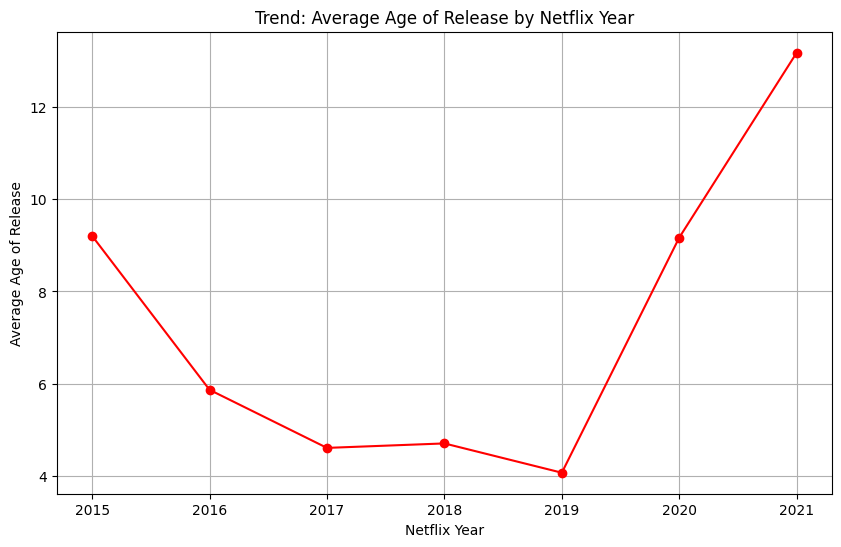

In [13]:
# Calculate the Age of release
df['Age'] = df['NetflixYear'] - df['ReleaseYear']

# Drop rows where Release Year is 0
df_age = df[df['ReleaseYear'] != 0]

# Group by Netflix Year and calculate the average Age of release
average_age_by_netflix_year = df_age.groupby('NetflixYear')['Age'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_age_by_netflix_year.index, average_age_by_netflix_year, marker='o', linestyle='-', color='red')

# Add labels and title
plt.xlabel('Netflix Year')
plt.ylabel('Average Age of Release')
plt.title('Trend: Average Age of Release by Netflix Year')

# Show the plot
plt.grid(True)
plt.show()

## Corel Matrix

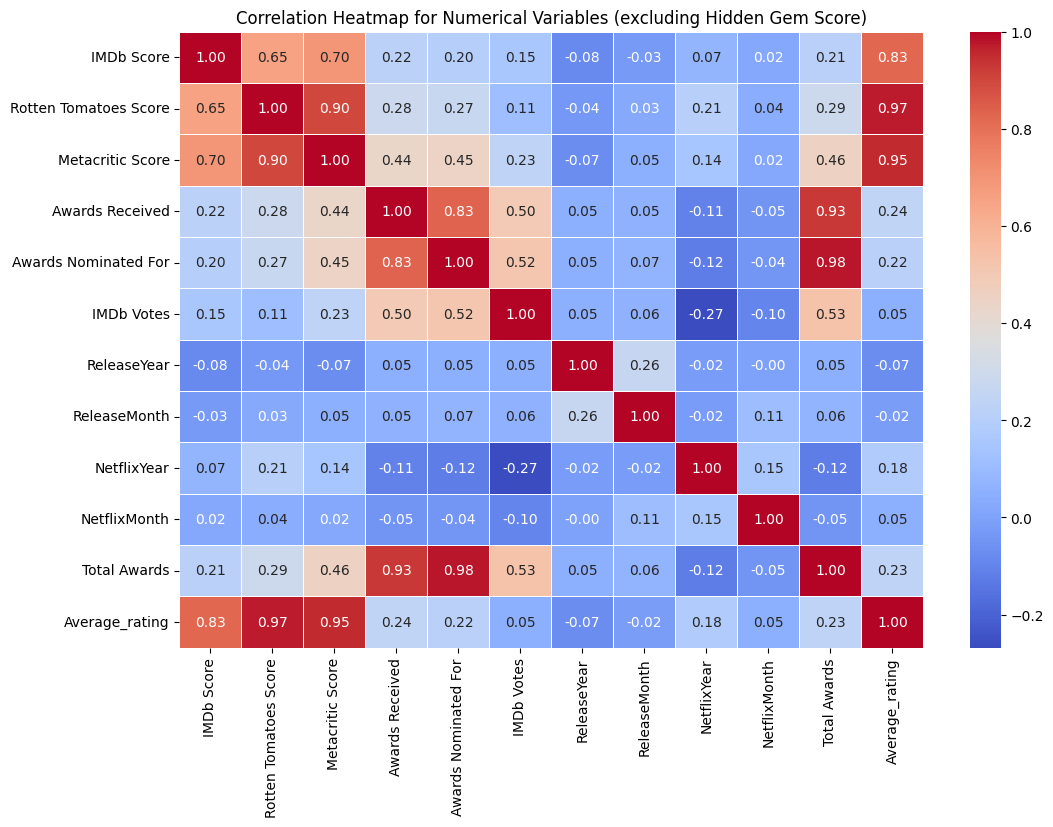

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns excluding 'Hidden Gem Score'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Hidden Gem Score']

# Calculate the correlation matrix for numerical variables
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables (excluding Hidden Gem Score)')
plt.show()

#### Data Cleaning for Genre and Country Analysis

In [15]:
# Read the cleaned excel file
file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
df = pd.read_excel(file_path)

# df['Genre'] = df['Genre'].astype(str)
# df['Country Availability'] = df['Country Availability'].astype(str)

# # Strip leading and trailing whitespaces before splitting
# df['Genre'] = df['Genre'].str.strip()
# df['Country Availability'] = df['Country Availability'].str.strip()

# # Explode the 'Genre' and 'Country Availability' columns
# df = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
# df = df.assign(Country_Availability=df['Country Availability'].str.split(',')).explode('Country_Availability')

## Genre Distribution

C:\Users\ganes\AppData\Local\Temp\ipykernel_30976\2817384811.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, palette='rocket', order=df['Genre'].value_counts().index)


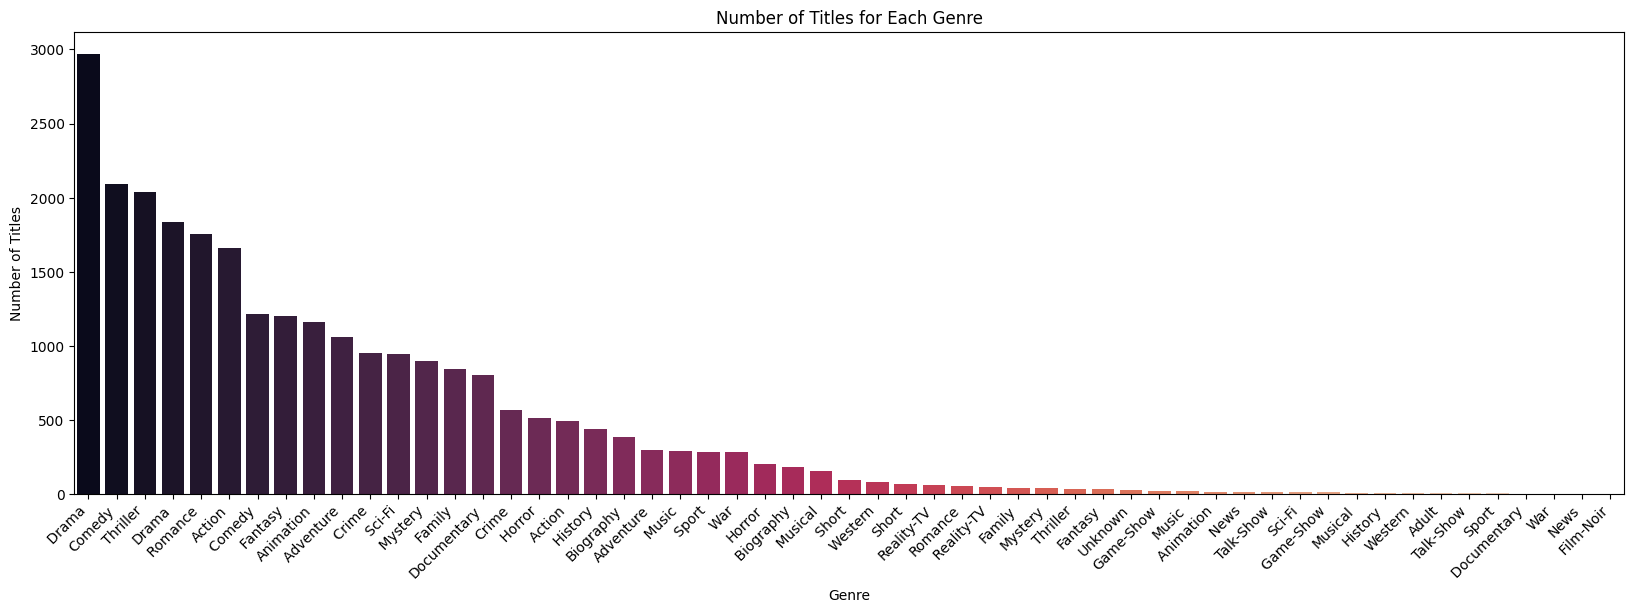

In [16]:
# Explode the 'Genres' column
df['Genre'] = df['Genre'].astype(str)
df['Genre'] = df['Genre'].str.strip()
df = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')

# Plot the count of each genre using the custom palette
plt.figure(figsize=(20, 6))
sns.countplot(x='Genre', data=df, palette='rocket', order=df['Genre'].value_counts().index)
plt.title('Number of Titles for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')


plt.show()

In [17]:
df['Genre'] = df['Genre'].astype(str)
df['Genre'] = df['Genre'].str.strip()
df = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26219 entries, 0 to 9424
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  26219 non-null  object 
 1   Genre                  26219 non-null  object 
 2   Languages              26219 non-null  object 
 3   Series or Movie        26219 non-null  object 
 4   Hidden Gem Score       26203 non-null  float64
 5   Country Availability   26219 non-null  object 
 6   Runtime                26219 non-null  object 
 7   Director               26219 non-null  object 
 8   Actors                 26219 non-null  object 
 9   View Rating            20612 non-null  object 
 10  IMDb Score             26207 non-null  float64
 11  Rotten Tomatoes Score  15816 non-null  float64
 12  Metacritic Score       12259 non-null  float64
 13  Awards Received        26219 non-null  int64  
 14  Awards Nominated For   26219 non-null  int64  
 15  Boxoffic

In [8]:
# Read the cleaned excel file
file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
df = pd.read_excel(file_path)
df['Genre'] = df['Genre'].astype(str)
df_exploded_Genre = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
df_exploded_Genre['Genre'] = df_exploded_Genre['Genre'].str.replace('\s+',' ', regex=True).str.strip()

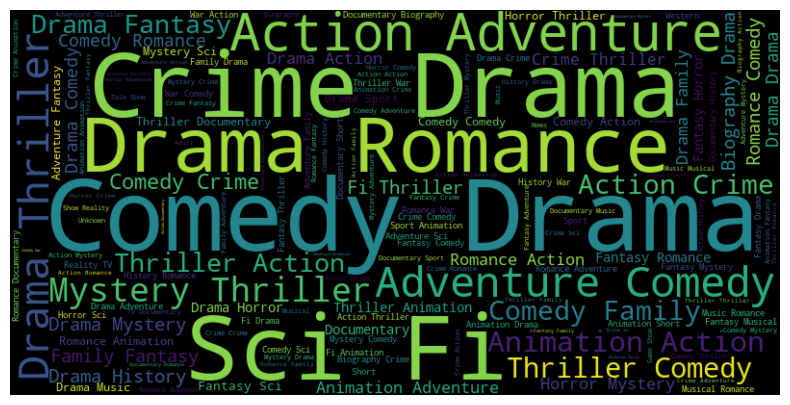

In [9]:
# popularity check of Genres using wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all words in the 'text_column' into a single string
all_text = ' '.join(df_exploded_Genre['Genre'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [18]:
# Read the cleaned excel file
file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
df = pd.read_excel(file_path)

## Country Distribution

C:\Users\ganes\AppData\Local\Temp\ipykernel_30976\3277079769.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country_Availability', data=df_sorted_1, palette='rocket', order=df_sorted_1['Country_Availability'].value_counts().index)


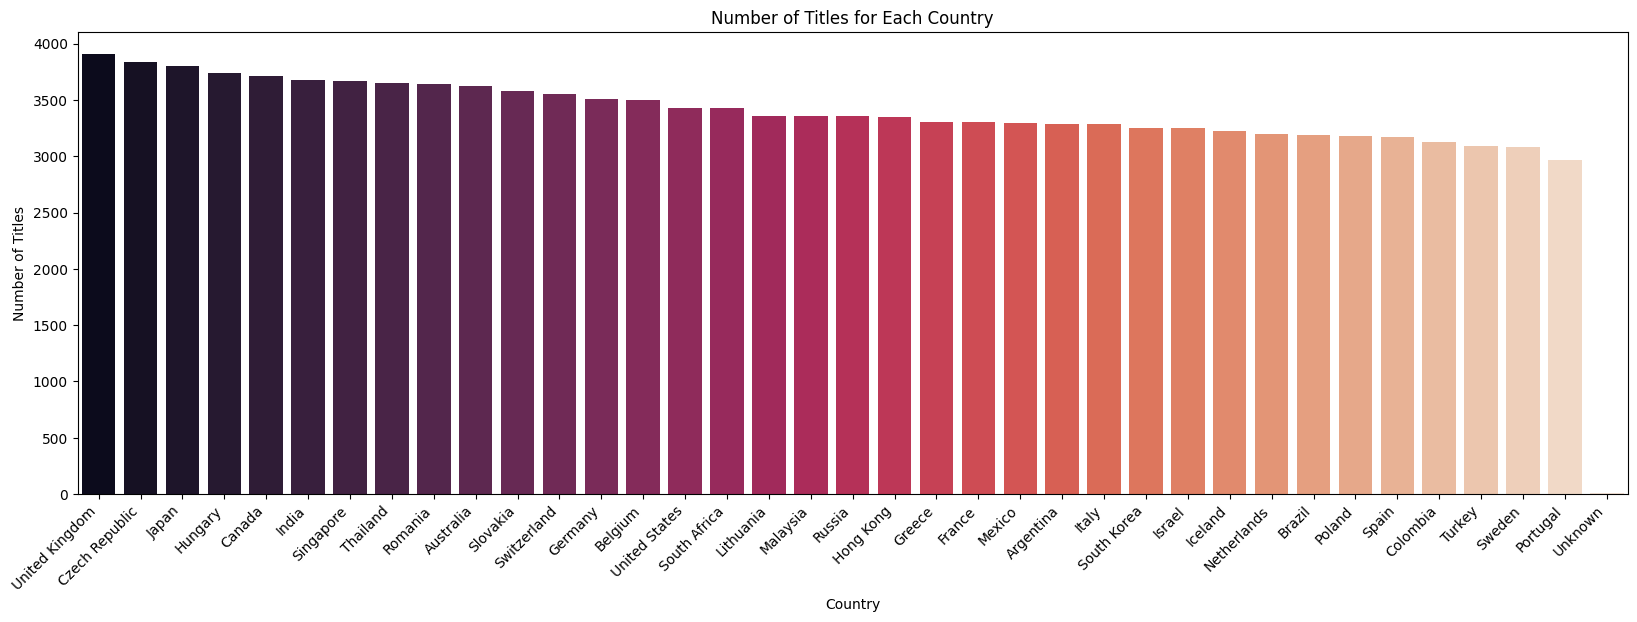

In [19]:
# Explode the 'Genres' and 'Languages' columns
df['Country Availability'] = df['Country Availability'].astype(str)
df['Country Availability'] = df['Country Availability'].str.strip()
df = df.assign(Country_Availability=df['Country Availability'].str.split(',')).explode('Country_Availability')

# Calculate the count of each genre
title_counts = df['Country_Availability'].value_counts()

# Sort the DataFrame based on the counts in descending order
df_sorted_1 = df[df['Country_Availability'].isin(title_counts.index)].sort_values('Country_Availability', key=lambda x: title_counts[x], ascending=False)

# Plot the count of each genre using the custom palette
plt.figure(figsize=(20, 6))
sns.countplot(x='Country_Availability', data=df_sorted_1, palette='rocket', order=df_sorted_1['Country_Availability'].value_counts().index)
plt.title('Number of Titles for Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

## Box Office Analysis

In [20]:
# # Read the cleaned excel file
# file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
# df = pd.read_excel(file_path)

In [21]:
# # Drop rows where box office revenue is zero
# df_boxoffice = df[df['Boxoffice'] > 0]

# # Convert 'Release Date' to datetime
# df_boxoffice['Release Date'] = pd.to_datetime(df_boxoffice['Release Date'], errors='coerce')

# # Extract the year from the 'Release Date'
# df_boxoffice['Release Year'] = df_boxoffice['Release Date'].dt.year

# # Plot average box office earnings over the years
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Release Year', y='Boxoffice', data=df_boxoffice.groupby('Release Year')['Boxoffice'].mean().reset_index())
# plt.title('Average Box Office Earnings Over the Years')
# plt.xlabel('Release Year')
# plt.ylabel('Average Box Office Earnings')
# plt.show()

In [22]:
## Language Analysis

In [23]:
# Read the cleaned excel file
file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
df = pd.read_excel(file_path)

## Language Distribution

C:\Users\ganes\AppData\Local\Temp\ipykernel_30976\647962813.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Languages', data=df_top_20, palette='rocket', order=df_top_20['Languages'].value_counts().index)


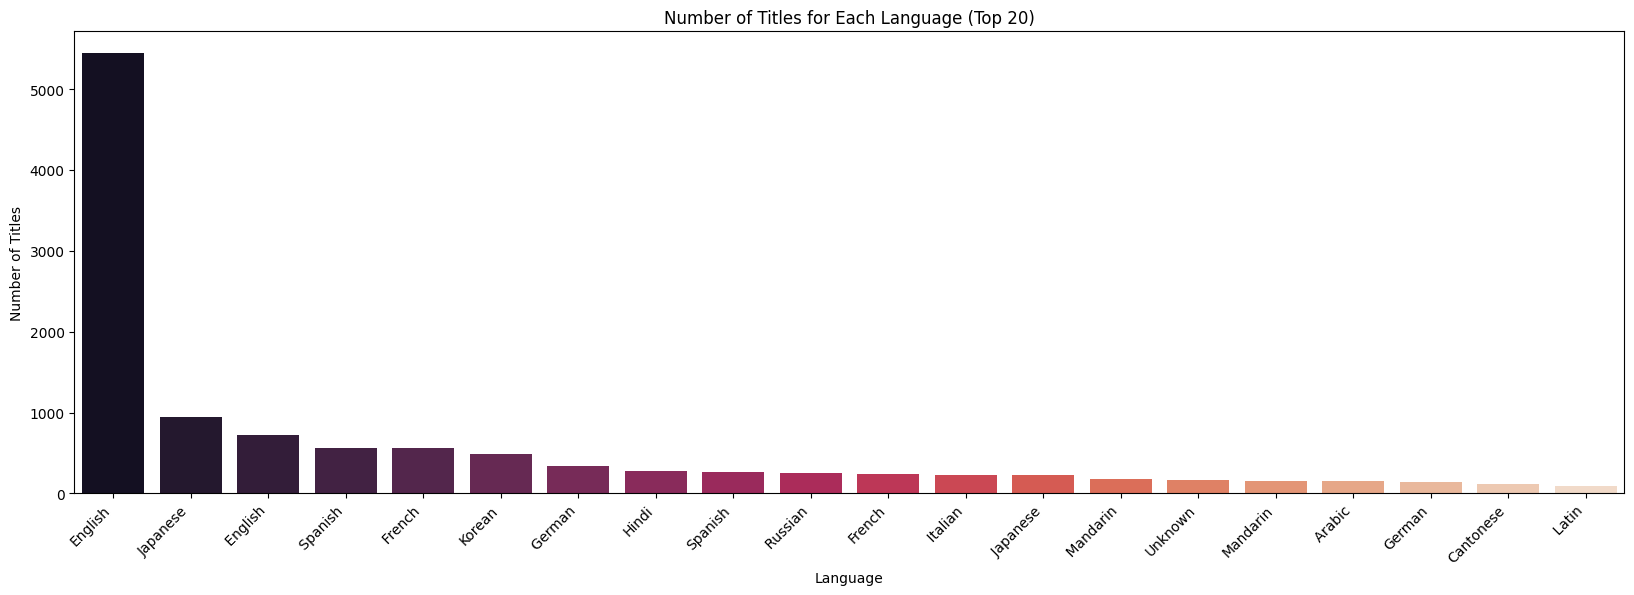

In [24]:
# Explode the 'Genres' and 'Languages' columns
df['Languages'] = df['Languages'].astype(str)
df['Languages'] = df['Languages'].str.strip()
df = df.assign(Languages=df['Languages'].str.split(',')).explode('Languages')

# Calculate the count of each genre
title_counts = df['Languages'].value_counts()

# Sort the DataFrame based on the counts in descending order
df_sorted_2 = df[df['Languages'].isin(title_counts.index)].sort_values('Languages', key=lambda x: title_counts[x], ascending=False)

# Get the top 20 languages
top_20_languages = title_counts.head(20).index

# Filter the DataFrame to include only the top 20 languages
df_top_20 = df[df['Languages'].isin(top_20_languages)]

# Plot the count of each genre using the custom palette
plt.figure(figsize=(20, 6))
sns.countplot(x='Languages', data=df_top_20, palette='rocket', order=df_top_20['Languages'].value_counts().index)
plt.title('Number of Titles for Each Language (Top 20)')
plt.xlabel('Language')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

## TV Rating Analysis

C:\Users\ganes\AppData\Local\Temp\ipykernel_30976\1917995539.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='View Rating', data=df, palette='rocket', order=title_counts.index)


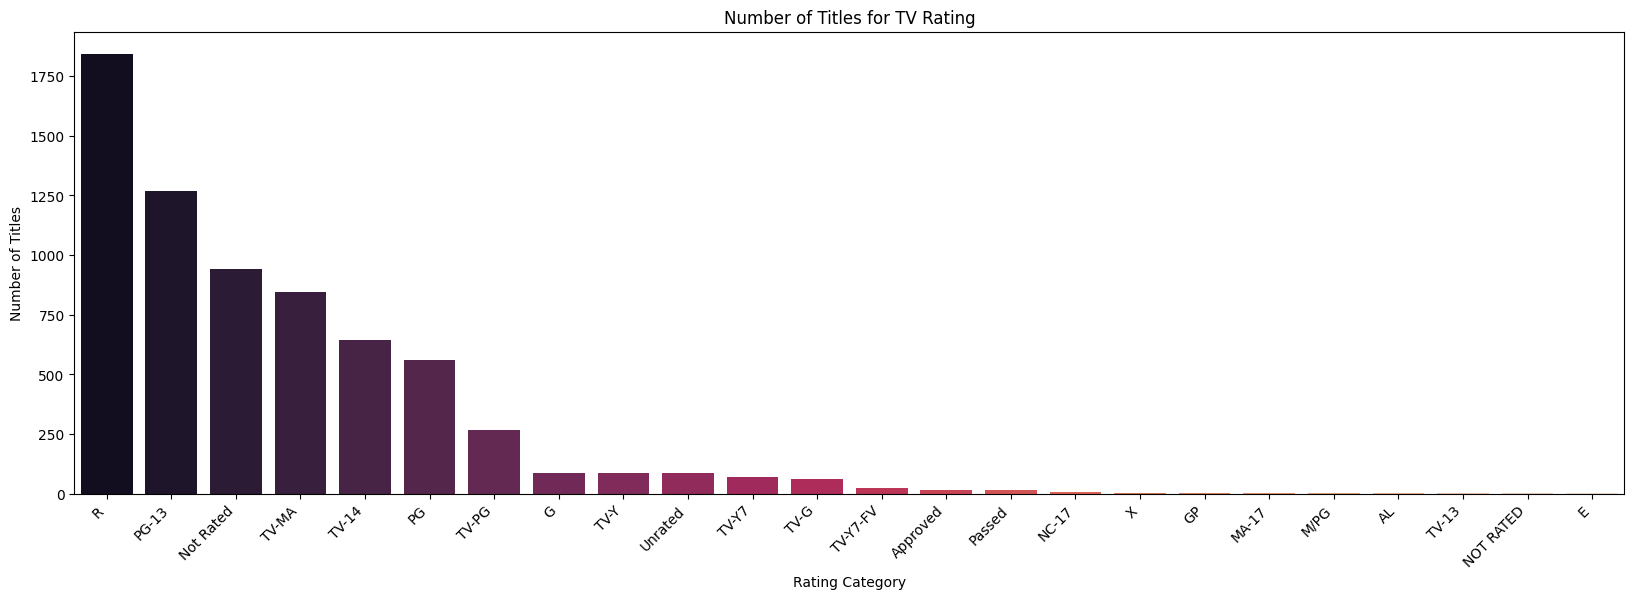

In [25]:
# Read the cleaned excel file
file_path = 'C:/Users/ganes/OneDrive/Personal Files/02. UMD_Smith/01. Masters Coursework/01. Semester 1/04. BUDT704_Python/Final Project/cleaned_data.xlsx'
df = pd.read_excel(file_path)


# Calculate the count of each Rating
title_counts = df['View Rating'].value_counts()

# Plot the count of each genre using the custom palette
plt.figure(figsize=(20, 6))
sns.countplot(x='View Rating', data=df, palette='rocket', order=title_counts.index)
plt.title('Number of Titles for TV Rating')
plt.xlabel('Rating Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


In [43]:
# Top movies and series based on Overall Net rating across IMDB,Rotten Tomatoes and Meta Critic
df['Rotten Tomatoes Score'] = df['Rotten Tomatoes Score']/10
df['Metacritic Score'] = df['Metacritic Score']/10
df['Average_rating'] = df[['IMDb Score','Rotten Tomatoes Score','Metacritic Score']].mean(axis=1, skipna=True)